<a href="https://colab.research.google.com/github/taskswithcode/latent-diffusion/blob/main/TWCLatentDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook to reproduce results of latent-diffusion**

## 1. Check GPU is available

In [3]:
!nvidia-smi

Fri Jul 29 17:43:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. Download the tar file containing original repository, environment snapshot, and required models

In [5]:
!gdown 1wdiXVpTkVcW5MhB8_5JtqpIPKWA2wUTy

Downloading...
From: https://drive.google.com/uc?id=1wdiXVpTkVcW5MhB8_5JtqpIPKWA2wUTy
To: /content/s3cfg
100% 2.03k/2.03k [00:00<00:00, 4.00MB/s]


In [9]:
!mv s3cfg /root/.s3cfg

In [7]:
!apt-get install s3cmd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1 python3-dateutil python3-magic python3-six
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-mgc libmagic1 python3-dateutil python3-magic python3-six s3cmd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 435 kB of archives.
After this operation, 6,068 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-six all 1.11.0-2 [11.4 kB]
Get:4 http://archive.ub

In [10]:
!s3cmd ls s3://repos

2022-07-24 21:49 6318161920   s3://repos/SimMIM.tar
2022-07-07 16:35 2895327169   s3://repos/a100_models.tar
2022-07-27 03:14     40960   s3://repos/bert_tabular_training_record_gen.tar
2022-07-27 03:13  14612480   s3://repos/core-scientific_save.tar
2022-07-27 01:13 119780925440   s3://repos/imagenet1k_train.tar
2022-07-26 04:47 34847201280   s3://repos/imagenet1k_tune.tar
2022-07-27 03:17        69   s3://repos/kaggle.json
2022-07-29 04:39 14767308800   s3://repos/latent-diffusion.tar
2022-07-07 16:53 2622992223   s3://repos/ldm.tar.gz
2022-07-28 21:02 8090941440   s3://repos/mae.tar
2022-07-27 20:39 4735856640   s3://repos/mae_save.tar
2022-07-28 00:27     20480   s3://repos/prior_mae_results.tar
2022-06-23 00:21 5685170632   s3://repos/twc_taming_transformers4.tar
2022-07-27 03:29  84766720   s3://repos/vae.tar


In [11]:
!s3cmd get s3://repos/latent-diffusion.tar

download: 's3://repos/latent-diffusion.tar' -> './latent-diffusion.tar'  [1 of 1]
download: 's3://repos/latent-diffusion.tar' -> './latent-diffusion.tar'  [1 of 1]
download: 's3://repos/latent-diffusion.tar' -> './latent-diffusion.tar'  [1 of 1]
 14767308800 of 14767308800   100% in  371s    37.95 MB/s  done


## 3. Extract from the tar file and change working directory

In [13]:
!tar xvf latent-diffusion.tar

Streaming output truncated to the last 5000 lines.
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/api.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/metadata.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/__init__.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/_keras.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/error.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/hparams_plugin.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/metrics.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/backend_context.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/hparams/plugin_data_pb2.py
latent-diffusion/conda_envs/lib/python3.8/site-packages/tensorboard/plugins/

In [14]:
cd latent-diffusion

/content/latent-diffusion


## 4. Set up local environment

In [15]:
!./twc_setup.sh

In [16]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from IPython.display import display # to display imag

## 5a. Run sample tests within the environment, starting with replicating tests from original repository

In [17]:
!(source conda_envs/bin/activate; python twc_codebook_examine.py -input twc_samples/sample1.png )

Traceback (most recent call last):
  File "twc_codebook_examine.py", line 6, in <module>
    from taming.models.vqgan import VQModel, GumbelVQ
  File "/content/latent-diffusion/taming/models/vqgan.py", line 7, in <module>
    from taming.modules.diffusionmodules.model import Encoder, Decoder
ModuleNotFoundError: No module named 'taming.modules.diffusionmodules'


In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input 'https://heibox.uni-heidelberg.de/f/6f12b330eb564d288d76/?dl=1' -no-is_local  -output rtest2.png)

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input 'https://heibox.uni-heidelberg.de/f/be6f4ff34e1544109563/?dl=1' -no-is_local  -output rtest3.png)

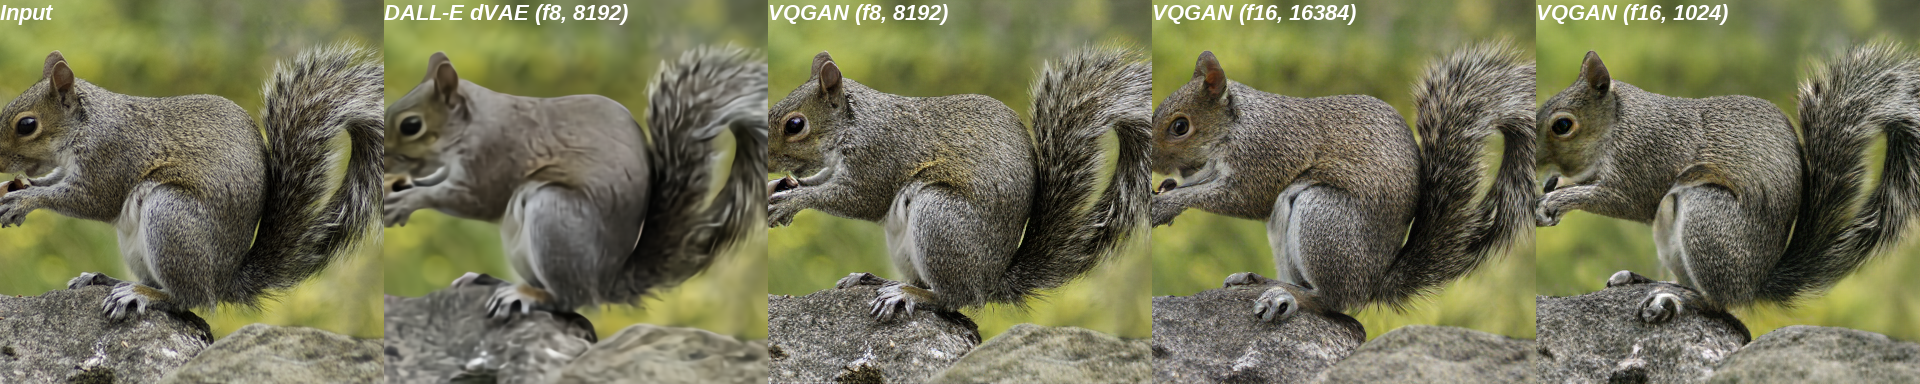

In [ ]:
pil_im = Image.open('rtest1.png')
display(pil_im)

In [ ]:
pil_im = Image.open('rtest2.png')
display(pil_im)

In [ ]:
pil_im = Image.open('rtest3.png')
display(pil_im)

## 5b. Run additional sample tests within the enivornment - local file tests

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input twc_samples/sample1.png -output test1.png)

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input twc_samples/sample2.png -output test2.png)

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input twc_samples/sample3.png -output test3.png)

In [ ]:
pil_im = Image.open('test1.png')
display(pil_im)

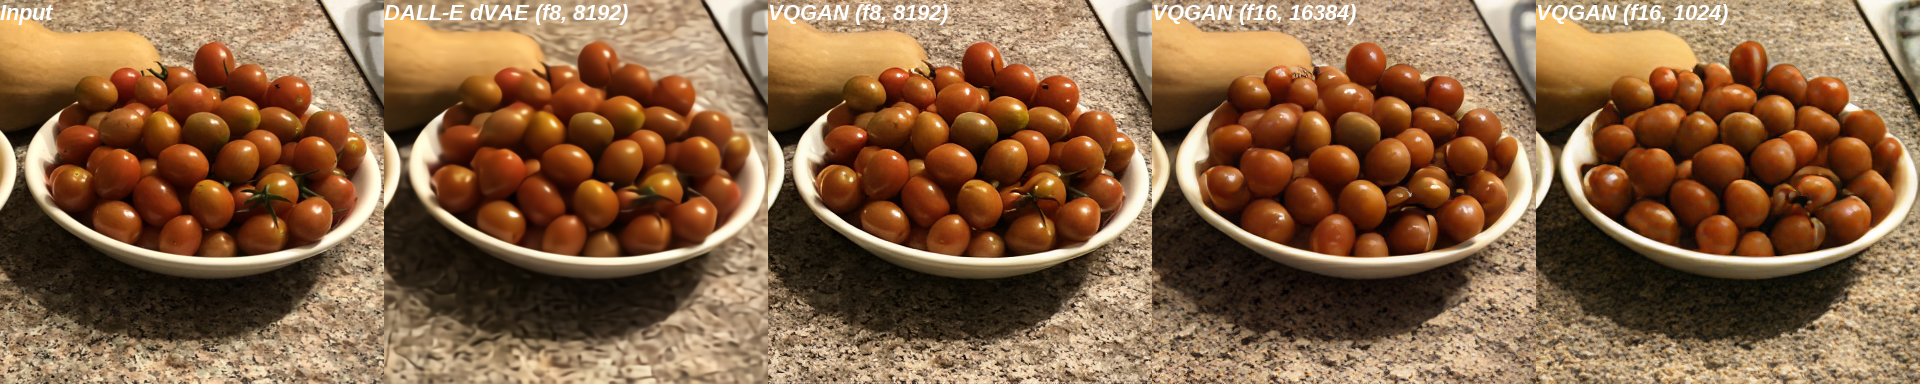

In [ ]:
pil_im = Image.open('test2.png')
display(pil_im)

In [ ]:
pil_im = Image.open('test3.png')
display(pil_im)